In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./2.csv", delimiter=";")
df.head()

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,Nuevo,0,0,M,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,BRENA,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE REDES Y COMUNICACIONES,MIXTO,SIN BENEFICIO,Presencial,5. >=30,No,0,0
1,Nuevo,1,0,M,COLEGIO,COLEGIO SISE,PRIVADA,LIMA,LIMA,VILLA MARIA DEL TRIUNFO,...,UTP Lima Centro,Fac. Ing. Sist. Y Elect.,ING. DE SISTEMAS,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,3,0
2,Nuevo,1,1,F,NaN,NaN,NaN,LIMA,LIMA,JESUS MARIA,...,UTP Lima Centro,Fac. Der. Cienc. Polit. Y RRII,DERECHO,NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,1,0
3,Nuevo,0,0,F,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,LIMA,LIMA,ATE,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADMINISTRACION DE NEGOCIOS (50/50),NOCHE,SIN BENEFICIO,Presencial,4. 24-29,No,0,0
4,Nuevo,1,1,F,INSTITUTO,IDAT,PRIVADA,LIMA,LIMA,SURQUILLO,...,UTP Lima Centro,Fac. Adm. Y Neg.,ADM. DE NEGOCIOS INTERNACIO,MAÑANA,CONVENIOS,Presencial,4. 24-29,No,2,0


In [3]:
df.describe()

,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
count,37582.000000,37582.000000,37582.000000,37582.000000
mean,0.861476,0.841334,1.940078,0.148422
std,0.345453,0.365370,0.986984,0.512012
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000
75%,1.000000,1.000000,3.000000,0.000000
max,1.000000,1.000000,6.000000,5.000000


In [4]:
def checknulls():
    for col in df.columns:
        if(df[col].hasnans):
            print(col, df[col].isnull().sum())
checknulls()

GENDER 2
TYPE OF EDUCATIONAL INSTITUTION 21714
EDUCATIONAL INSTITUTION 19370
INSTITUTION STATUS 21714
DEPARTMENT 736
PROVINCE 736
DISTRICT 736
CLASSIFICATION 1
FACULTY 1
PROGRAM/MAJOR 1
SHIFT/SCHEDULE 58
AGE RANGE OF ENROLLED STUDENT 4


In [5]:
# Treating unknown values (U) as nan
df['GENDER'] = df['GENDER'].replace('U', np.nan)
df['GENDER'].unique()

array(['M', 'F', nan, '2', '1'], dtype=object)

In [6]:
checknulls()

GENDER 203
TYPE OF EDUCATIONAL INSTITUTION 21714
EDUCATIONAL INSTITUTION 19370
INSTITUTION STATUS 21714
DEPARTMENT 736
PROVINCE 736
DISTRICT 736
CLASSIFICATION 1
FACULTY 1
PROGRAM/MAJOR 1
SHIFT/SCHEDULE 58
AGE RANGE OF ENROLLED STUDENT 4


In [7]:
# drop rows with null values
df.dropna(subset = ['CLASSIFICATION', 'FACULTY', 'PROGRAM/MAJOR','GENDER', 'AGE RANGE OF ENROLLED STUDENT', 'DEPARTMENT', 'PROVINCE', 'DISTRICT', 'SHIFT/SCHEDULE'], inplace = True)
df['CLASSIFICATION'].hasnans

False

In [8]:
checknulls()

TYPE OF EDUCATIONAL INSTITUTION 20949
EDUCATIONAL INSTITUTION 18637
INSTITUTION STATUS 20949


In [9]:
df.columns

Index(['ENROLLMENT', 'TUITION PAYMENT MARCH 2022',
       'TUITION PAYMENT MARCH 2023', 'GENDER',
       'TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION',
       'INSTITUTION STATUS', 'DEPARTMENT', 'PROVINCE', 'DISTRICT',
       'CLASSIFICATION', 'CAMPUS', 'FACULTY', 'PROGRAM/MAJOR',
       'SHIFT/SCHEDULE', 'BENEFIT DISCOUNTS', 'STUDY MODE',
       'AGE RANGE OF ENROLLED STUDENT', 'DISABILITY',
       'NUMBER OF ENROLLED COURSES', 'AT-RISK COURSE'],
      dtype='object')

In [10]:
# Exclude the columns 'TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION', 'INSTITUTION STATUS' because they have large number of missing values because they are irrevelant
cat_cols = set(df.columns) - {'TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION', 'INSTITUTION STATUS'}
for col in df.columns:
    if(not(df[col].dtype==object)):
        cat_cols = cat_cols - {col}
        print(col,len(df[col].unique()),df[col].dtype)
    # if(len(df[col].unique())>10):
    #     print(col,len(df[col].unique()),df[col].dtype)
cat_cols = cat_cols - {"GENDER"}
cat_cols = list(cat_cols)
cat_cols

TUITION PAYMENT MARCH 2022 2 int64
TUITION PAYMENT MARCH 2023 2 int64
NUMBER OF ENROLLED COURSES 7 int64
AT-RISK COURSE 6 int64


['ENROLLMENT',
 'AGE RANGE OF ENROLLED STUDENT',
 'SHIFT/SCHEDULE',
 'STUDY MODE',
 'CAMPUS',
 'PROVINCE',
 'CLASSIFICATION',
 'DEPARTMENT',
 'PROGRAM/MAJOR',
 'DISABILITY',
 'FACULTY',
 'BENEFIT DISCOUNTS',
 'DISTRICT']

In [11]:
# Encoding
for col in cat_cols:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
df['GENDER'] = df['GENDER'].replace({'M':1, 'F':2, '2':2, '1':1})
df

C:\Users\visha\AppData\Local\Temp\ipykernel_24344\408686496.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['GENDER'] = df['GENDER'].replace({'M':1, 'F':2, '2':2, '1':1})


,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,TYPE OF EDUCATIONAL INSTITUTION,EDUCATIONAL INSTITUTION,INSTITUTION STATUS,DEPARTMENT,PROVINCE,DISTRICT,...,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
0,0,0,0,1,INSTITUTO,IDAT,PRIVADA,14,98,54,...,6,6,36,1,4,0,4,0,0,0
1,0,1,0,1,COLEGIO,COLEGIO SISE,PRIVADA,14,98,660,...,6,6,40,2,4,0,3,0,3,0
2,0,1,1,2,NaN,NaN,NaN,14,98,268,...,6,3,24,2,4,0,3,0,1,0
3,0,0,0,2,COLEGIO,1220 SAN JOSE MARELLO,ESTATAL,14,98,32,...,6,0,12,2,4,0,3,0,0,0
4,0,1,1,2,INSTITUTO,IDAT,PRIVADA,14,98,606,...,6,0,4,0,2,0,3,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,2,1,1,2,NaN,UNIVERSIDAD,NaN,3,8,95,...,13,4,80,1,4,2,4,0,2,0
37578,2,1,1,2,NaN,NaN,NaN,14,98,324,...,13,4,80,1,4,2,4,0,3,0
37579,2,1,1,2,NaN,NaN,NaN,14,98,308,...,13,0,3,2,4,2,4,0,3,0
37580,2,1,1,1,UNIVERSIDAD,PONTIFICIAUNIVERSIDADCATÓLIC,PRIVADA,14,98,137,...,13,5,54,1,4,2,4,0,3,0


In [12]:
# Train Test Split
X = df.drop(['TUITION PAYMENT MARCH 2023','TYPE OF EDUCATIONAL INSTITUTION', 'EDUCATIONAL INSTITUTION', 'INSTITUTION STATUS'], axis=1)
y = df['TUITION PAYMENT MARCH 2023']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Perform exploratory data analysis (EDA) to identify trends and anomalies

In [13]:
df.describe()

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,DEPARTMENT,PROVINCE,DISTRICT,CLASSIFICATION,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,1.885633,0.863028,0.842882,1.436721,11.301416,77.264351,333.768205,1.803165,6.519681,3.756287,39.344413,1.181883,3.977148,0.806664,2.194867,0.001995,1.947217,0.148890
std,0.411062,0.343823,0.363917,0.495986,4.977920,39.128958,207.070904,1.230257,4.136690,2.033755,23.491469,0.757864,0.260414,0.934002,1.355671,0.044626,0.985213,0.512906
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,7.000000,43.000000,124.000000,1.000000,3.000000,3.000000,21.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,14.000000,98.000000,320.000000,1.000000,6.000000,5.000000,40.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,14.000000,98.000000,532.000000,3.000000,9.000000,5.000000,57.000000,2.000000,4.000000,2.000000,3.000000,0.000000,3.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,24.000000,164.000000,693.000000,4.000000,13.000000,7.000000,82.000000,3.000000,6.000000,2.000000,4.000000,1.000000,6.000000,5.000000


In [14]:
cols = cat_cols+['TUITION PAYMENT MARCH 2022', 'TUITION PAYMENT MARCH 2023', 'NUMBER OF ENROLLED COURSES', 'AT-RISK COURSE']
cols

['ENROLLMENT',
 'AGE RANGE OF ENROLLED STUDENT',
 'SHIFT/SCHEDULE',
 'STUDY MODE',
 'CAMPUS',
 'PROVINCE',
 'CLASSIFICATION',
 'DEPARTMENT',
 'PROGRAM/MAJOR',
 'DISABILITY',
 'FACULTY',
 'BENEFIT DISCOUNTS',
 'DISTRICT',
 'TUITION PAYMENT MARCH 2022',
 'TUITION PAYMENT MARCH 2023',
 'NUMBER OF ENROLLED COURSES',
 'AT-RISK COURSE']

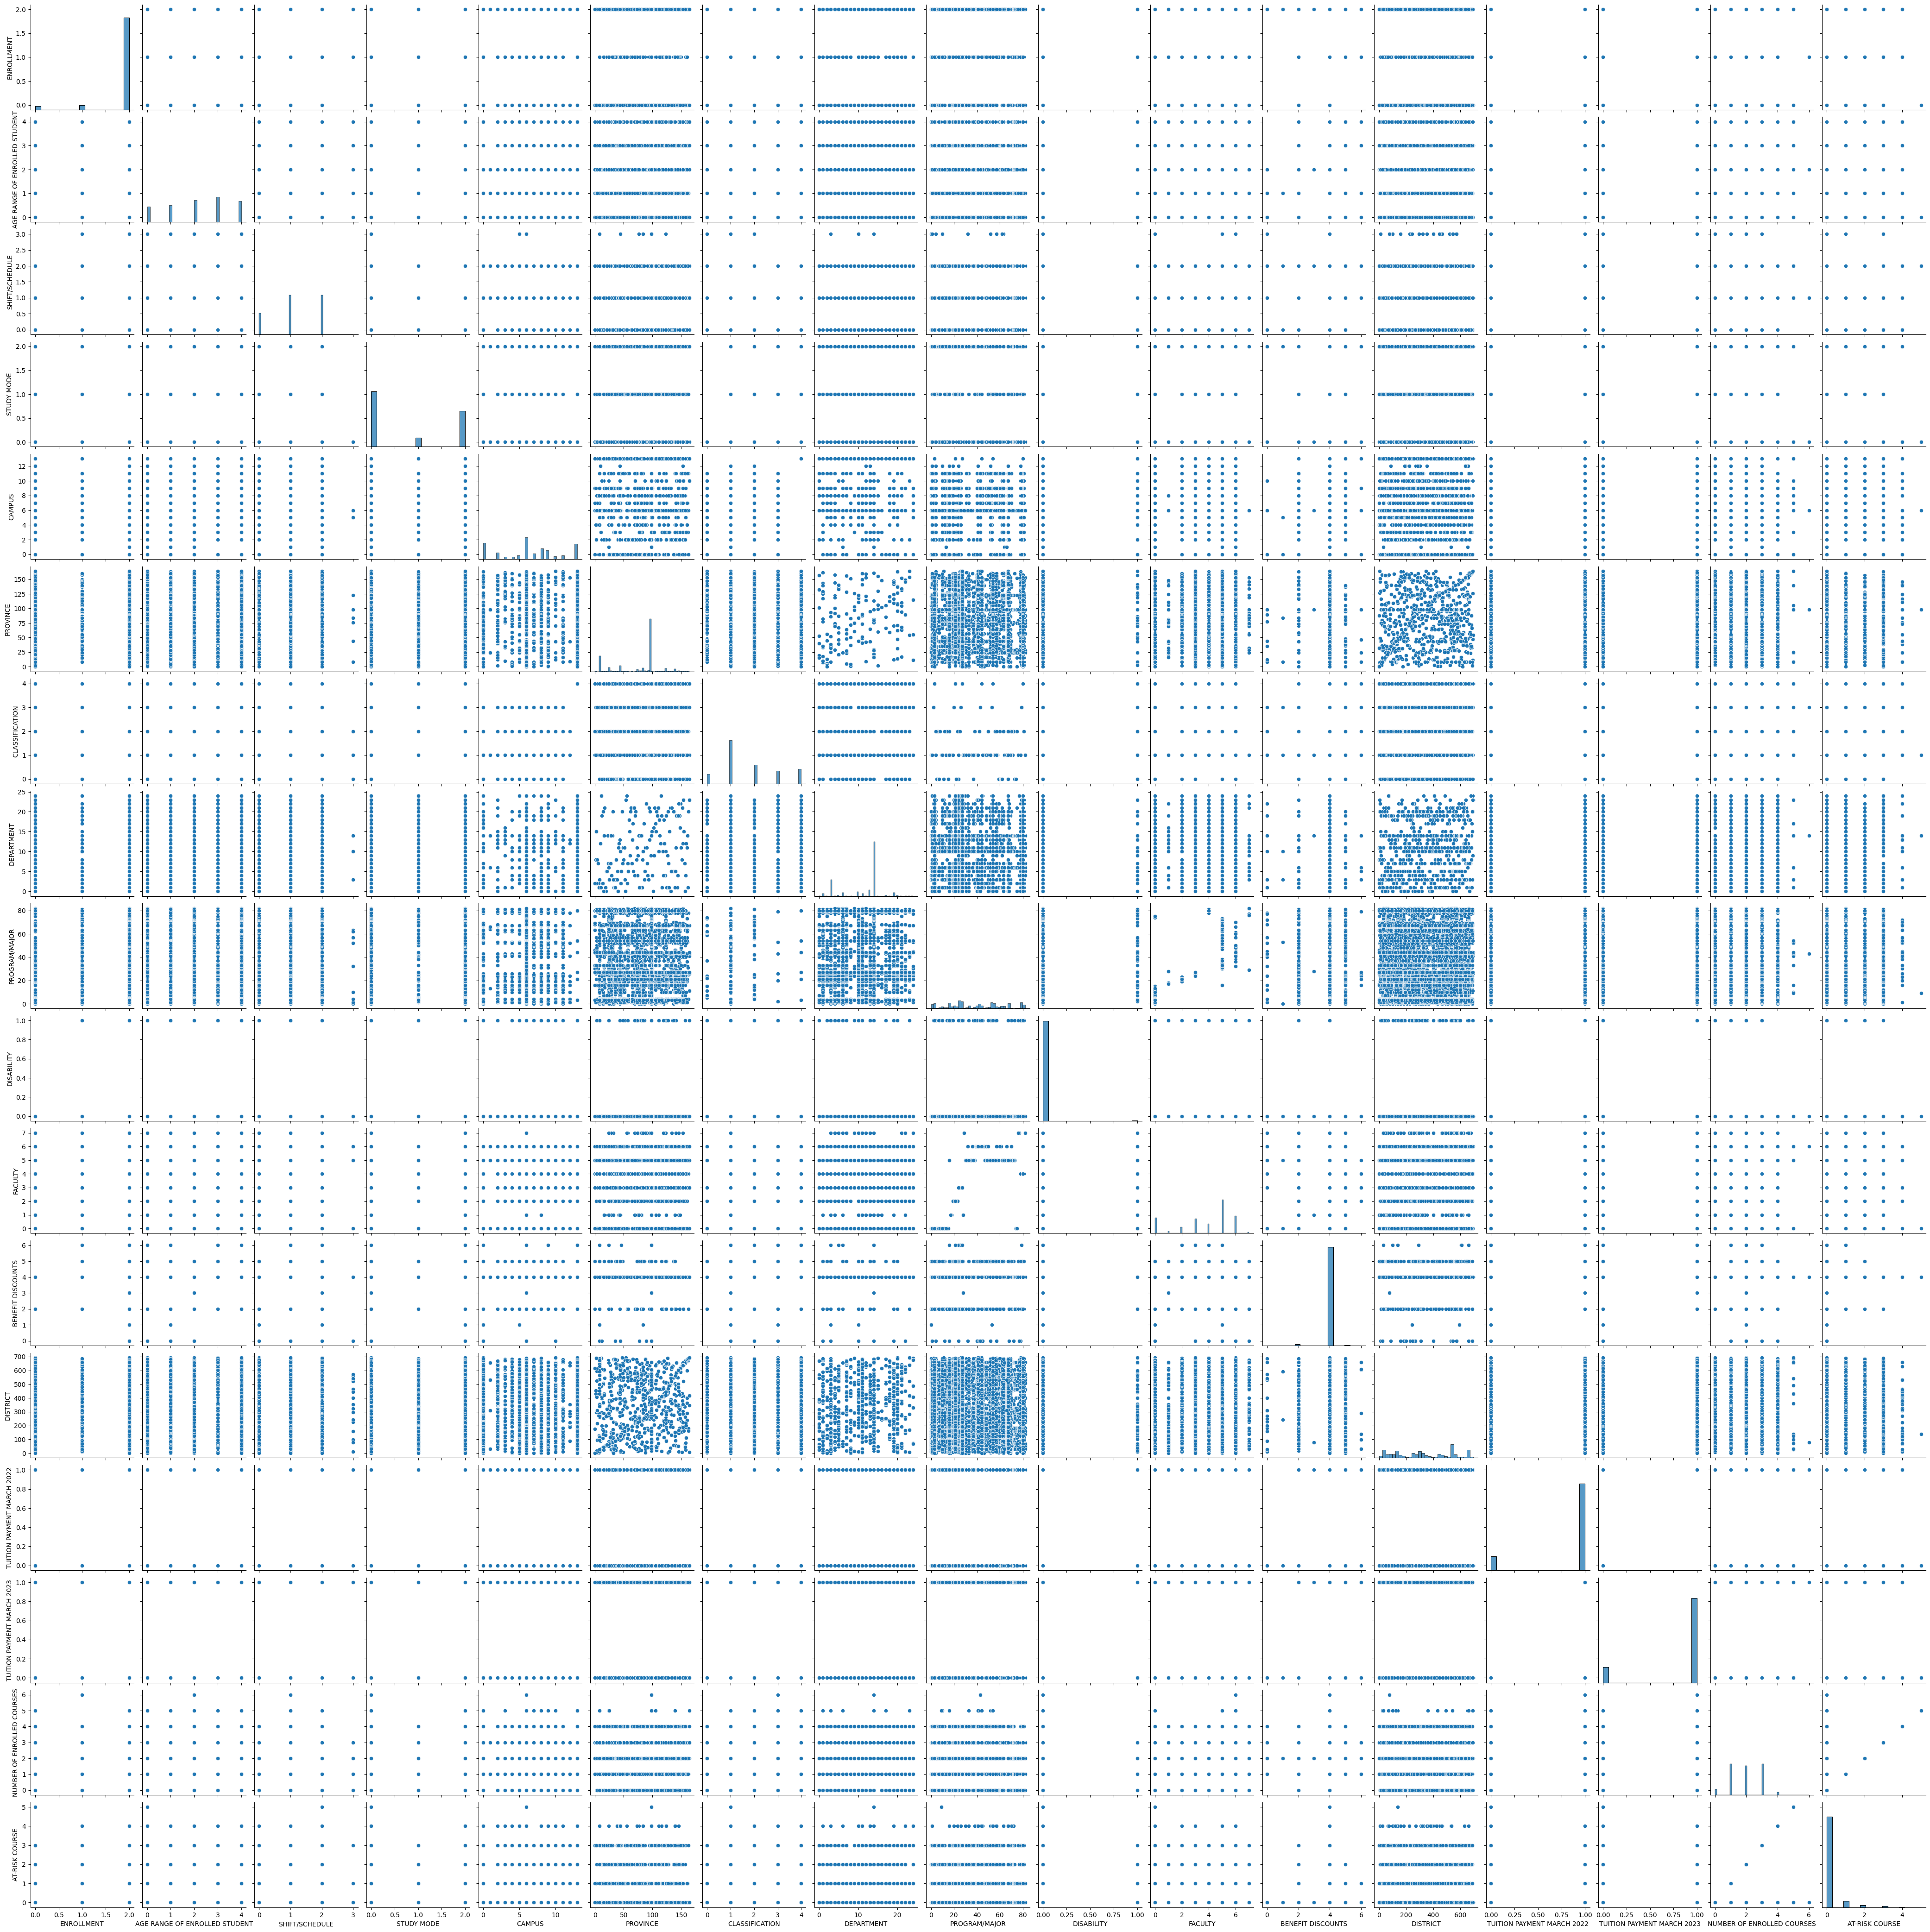

In [15]:
sns.pairplot(df[cols])

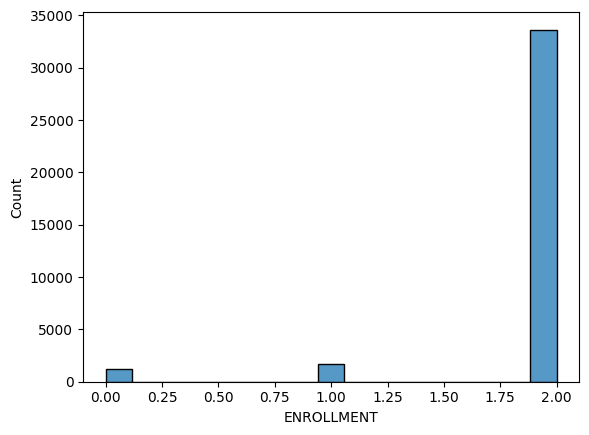

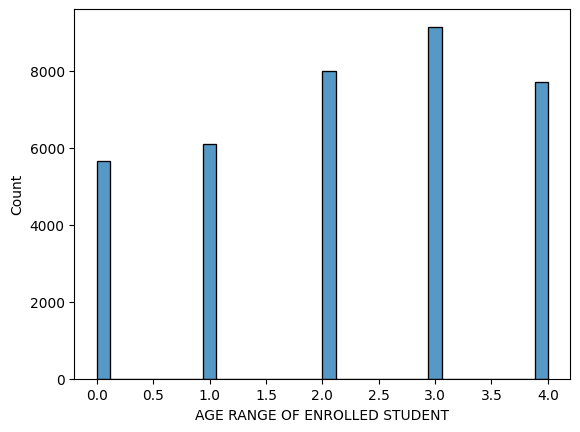

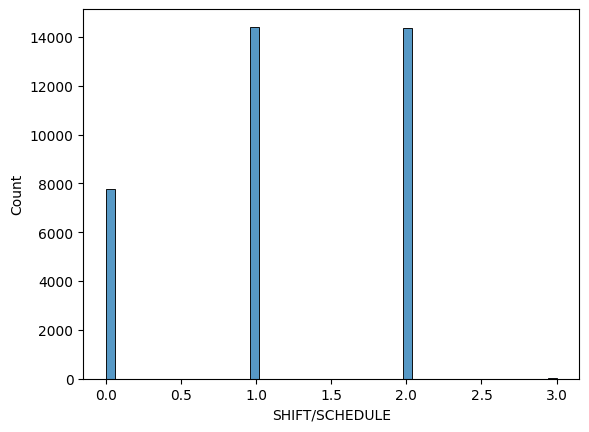

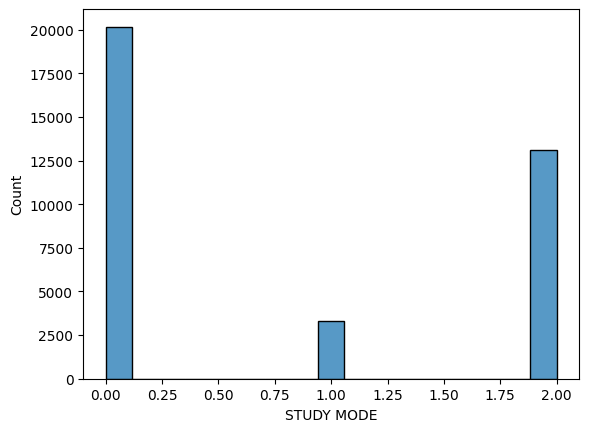

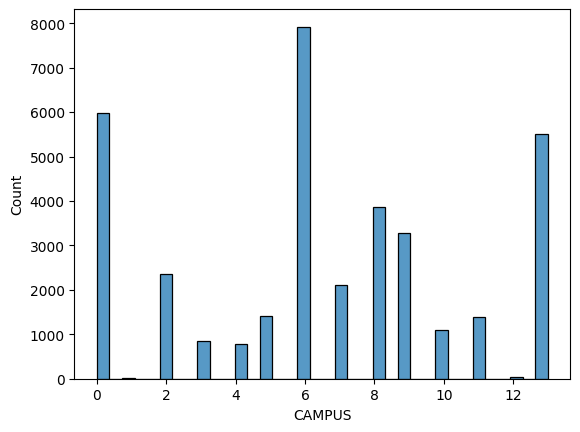

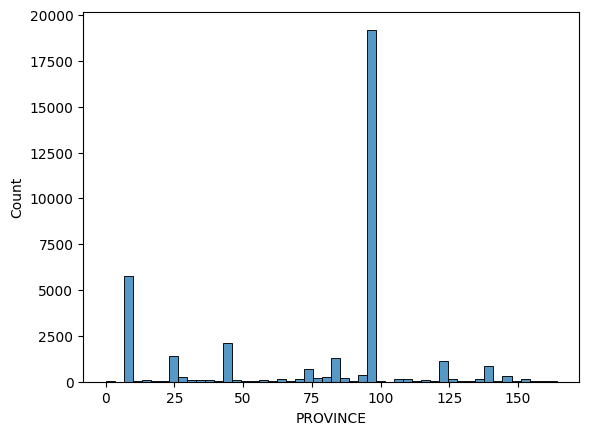

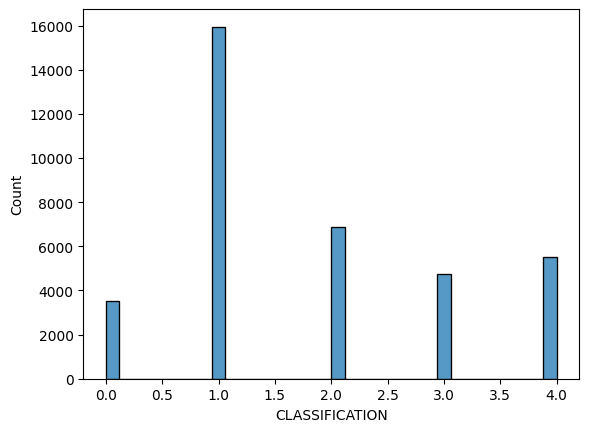

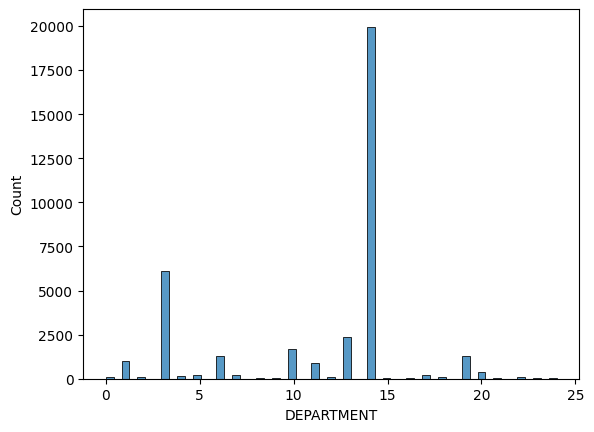

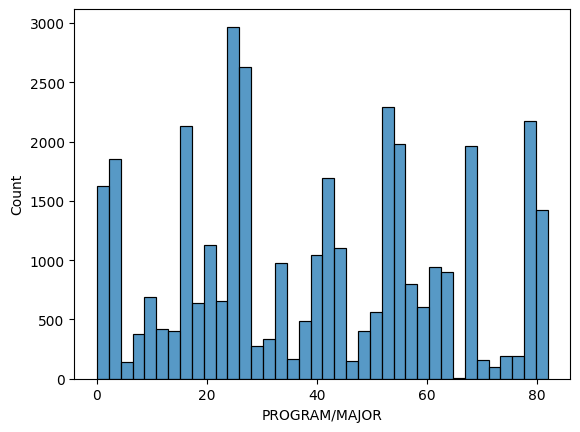

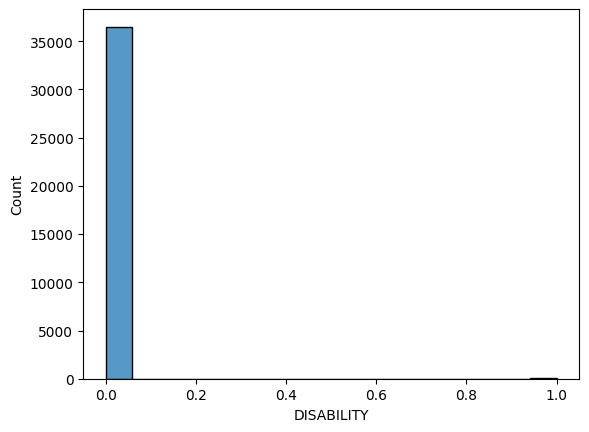

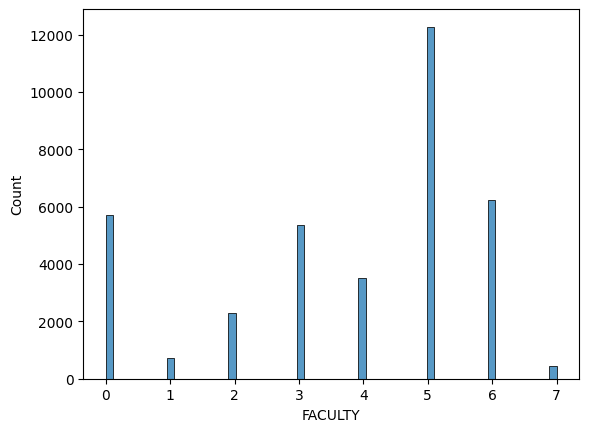

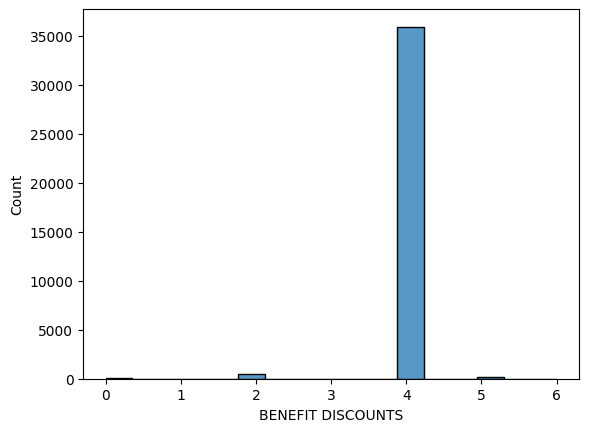

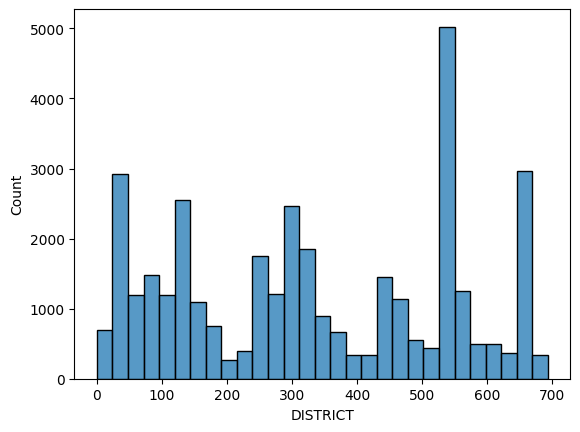

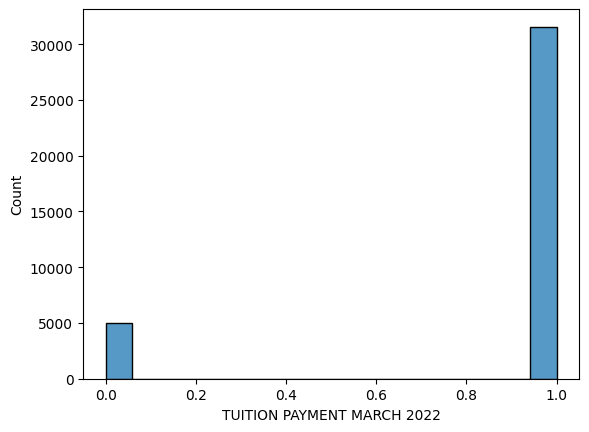

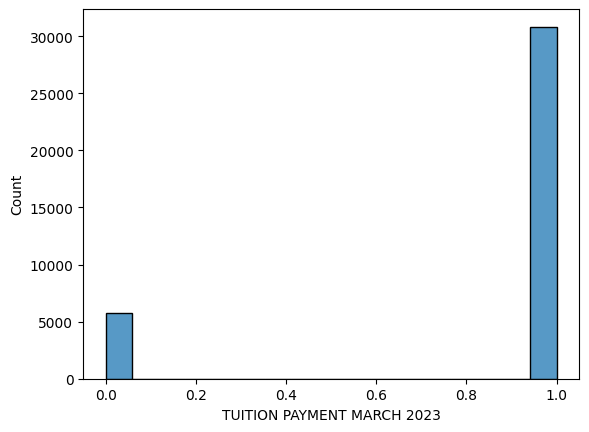

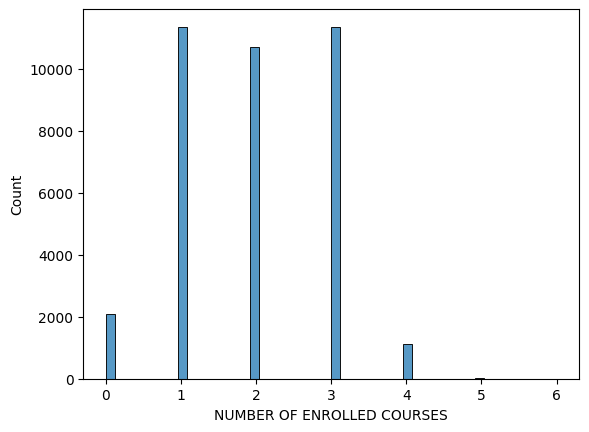

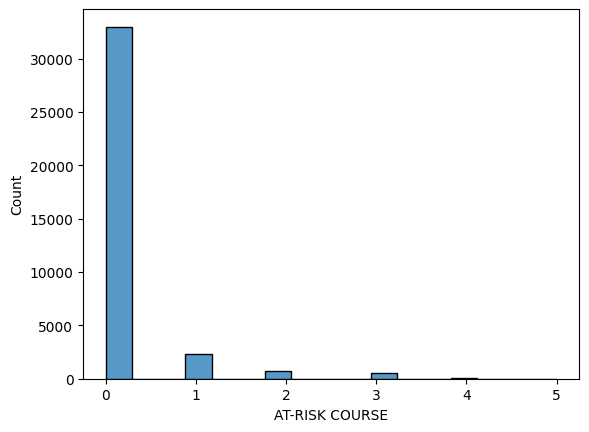

In [16]:
for col in cols:
    plt.figure()
    sns.histplot(df[col])
    plt.show()

In [17]:
df[cat_cols].corr()

,ENROLLMENT,AGE RANGE OF ENROLLED STUDENT,SHIFT/SCHEDULE,STUDY MODE,CAMPUS,PROVINCE,CLASSIFICATION,DEPARTMENT,PROGRAM/MAJOR,DISABILITY,FACULTY,BENEFIT DISCOUNTS,DISTRICT
ENROLLMENT,1.000000,-0.027454,-0.056508,0.024284,-0.012228,-0.005997,0.010564,0.011276,0.006415,0.009461,0.019269,-0.003220,0.019624
AGE RANGE OF ENROLLED STUDENT,-0.027454,1.000000,-0.000682,0.115137,0.278734,-0.029642,0.170260,0.033422,-0.004949,-0.001457,-0.073095,-0.034540,0.012332
SHIFT/SCHEDULE,-0.056508,-0.000682,1.000000,0.016739,-0.013837,0.014026,-0.026130,-0.019677,-0.001332,0.000584,0.034276,0.014135,0.013128
STUDY MODE,0.024284,0.115137,0.016739,1.000000,0.292212,0.033972,0.601834,0.014774,0.008158,0.004009,-0.043917,0.005549,-0.005617
CAMPUS,-0.012228,0.278734,-0.013837,0.292212,1.000000,0.475518,0.490618,0.489824,-0.037095,0.008746,-0.017365,-0.031250,0.206781
PROVINCE,-0.005997,-0.029642,0.014026,0.033972,0.475518,1.000000,0.012495,0.697685,-0.026390,0.000762,0.008260,-0.026858,0.251899
CLASSIFICATION,0.010564,0.170260,-0.026130,0.601834,0.490618,0.012495,1.000000,0.003091,0.040039,0.016116,-0.013033,0.008058,-0.011553
DEPARTMENT,0.011276,0.033422,-0.019677,0.014774,0.489824,0.697685,0.003091,1.000000,-0.035882,-0.006276,0.004270,-0.032368,0.224867
PROGRAM/MAJOR,0.006415,-0.004949,-0.001332,0.008158,-0.037095,-0.026390,0.040039,-0.035882,1.000000,0.005081,0.659824,0.037109,-0.010467
DISABILITY,0.009461,-0.001457,0.000584,0.004009,0.008746,0.000762,0.016116,-0.006276,0.005081,1.000000,-0.004882,-0.005485,-0.006931


<Axes: >

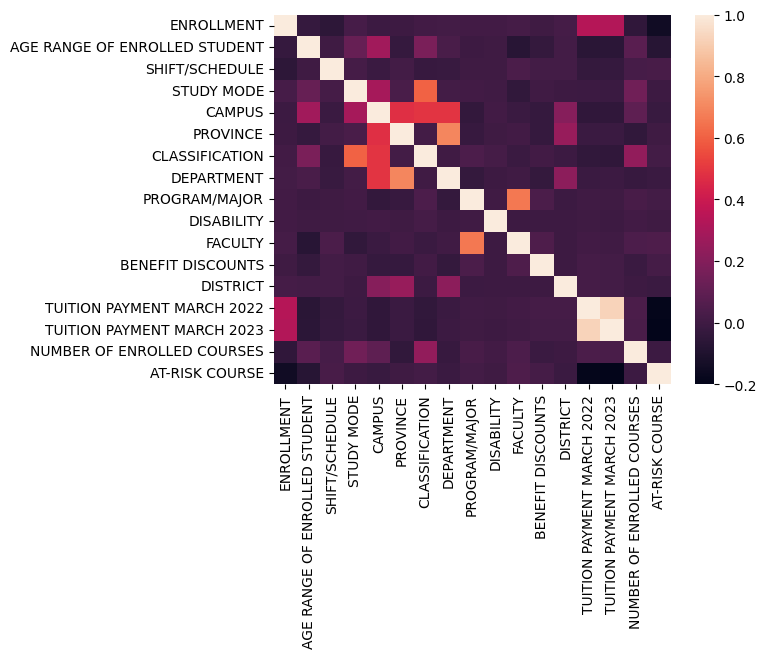

In [18]:
sns.heatmap(df[cols].corr())

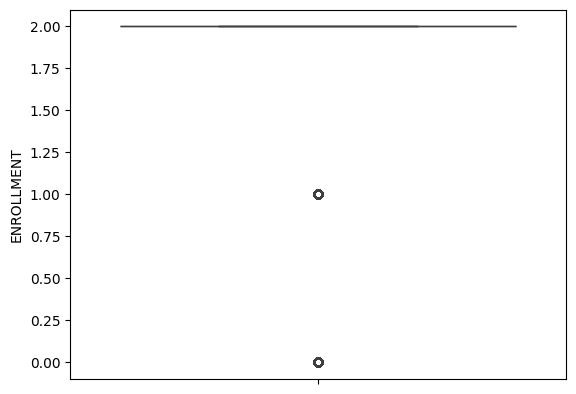

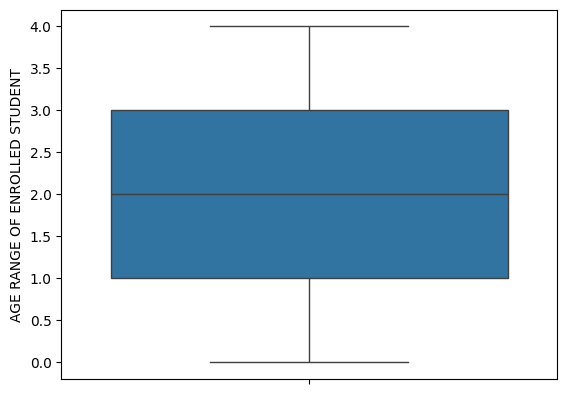

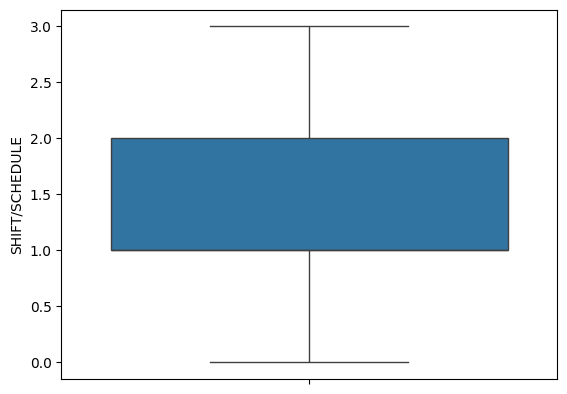

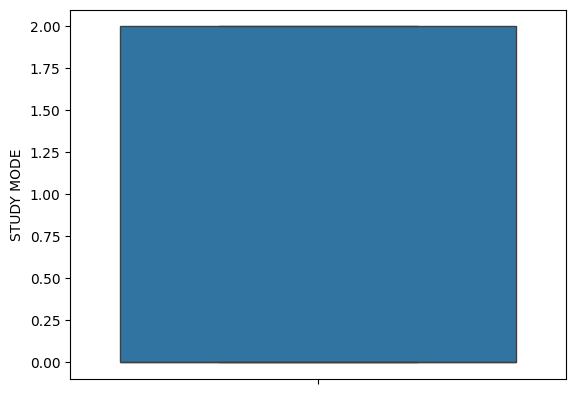

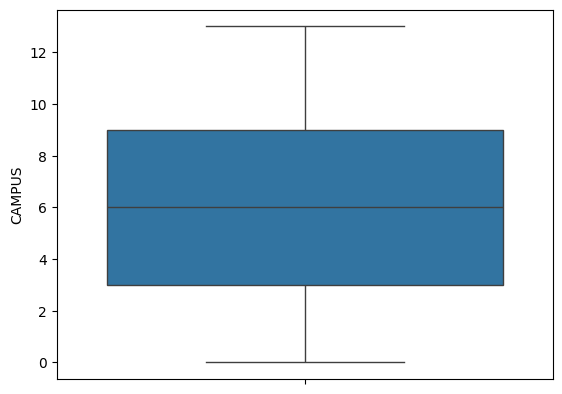

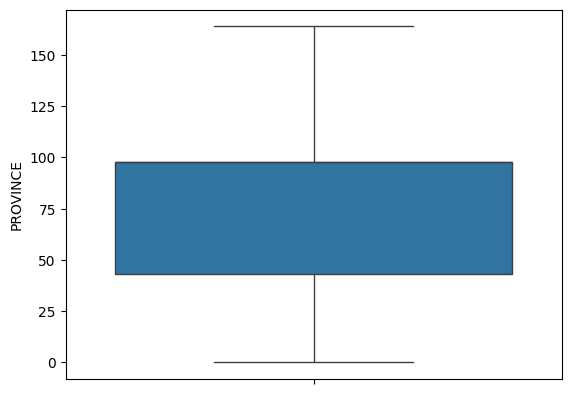

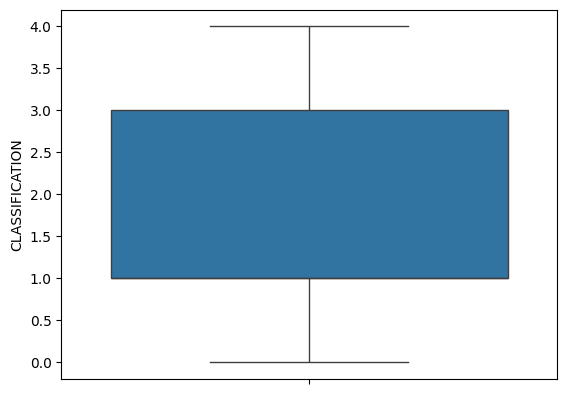

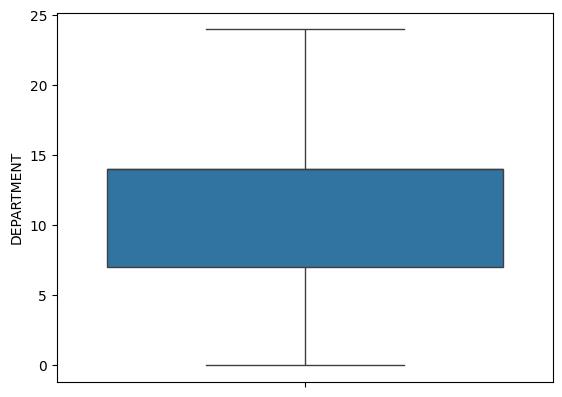

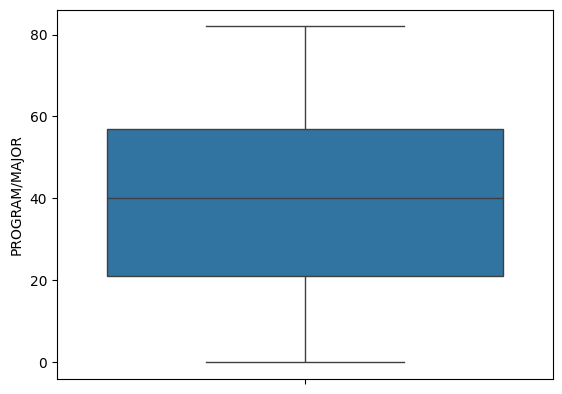

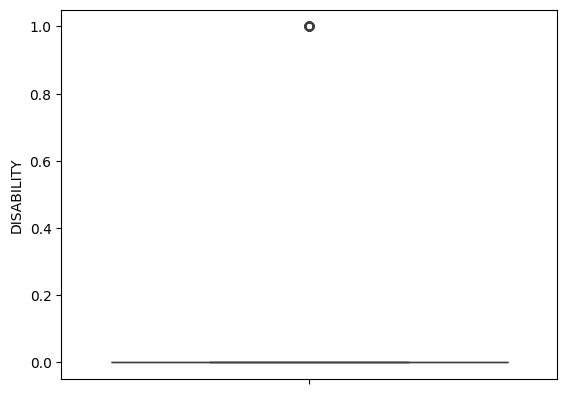

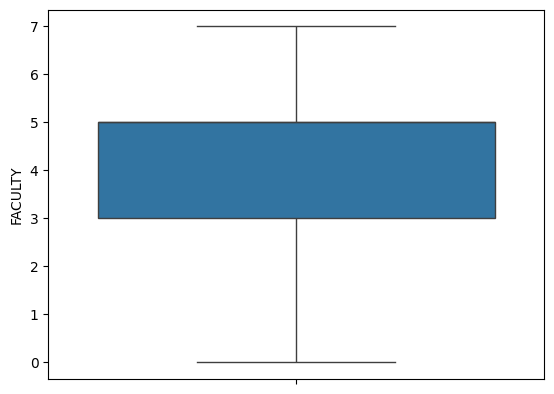

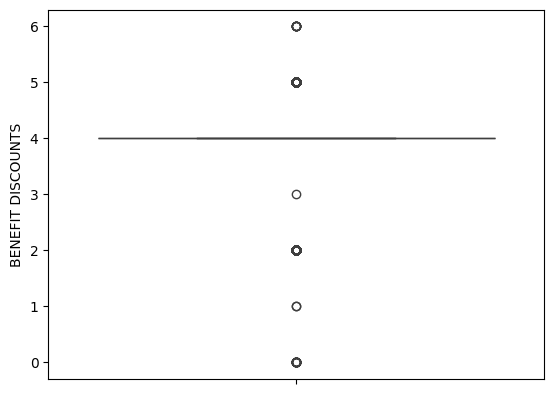

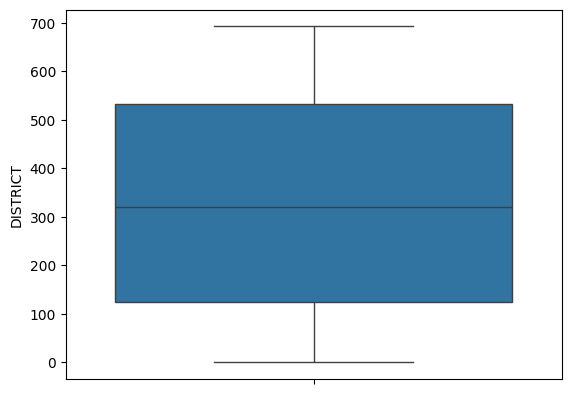

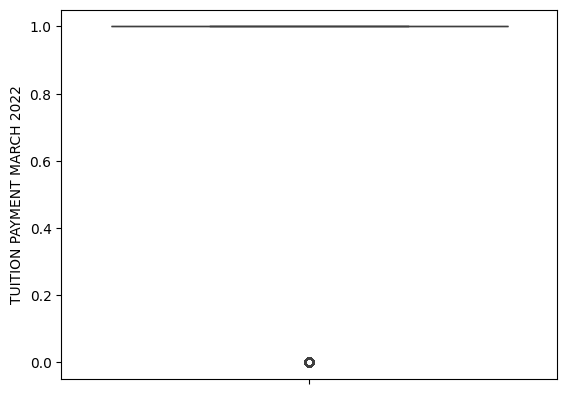

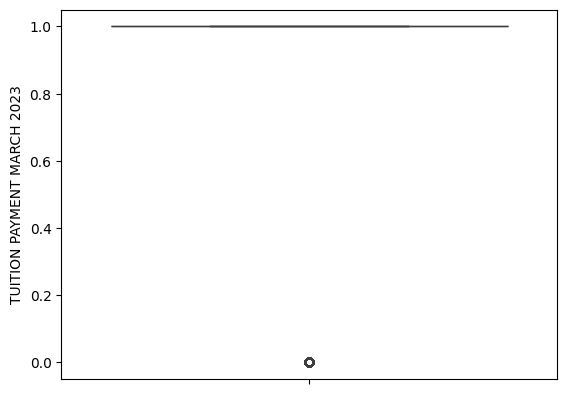

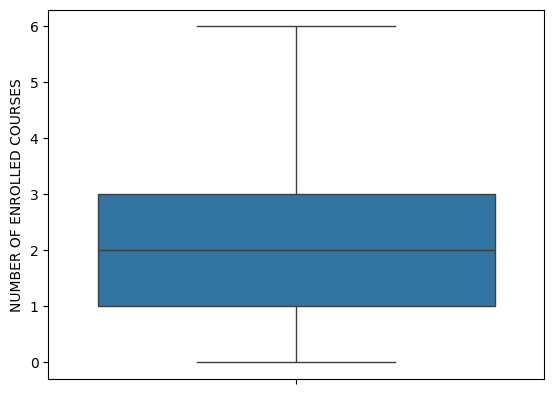

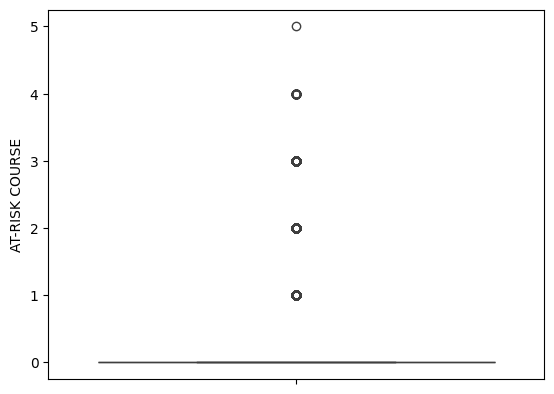

In [19]:
for col in cols:
    plt.figure()
    sns.boxplot(df,y=col)
    plt.show()

In [25]:
df.describe()

,ENROLLMENT,TUITION PAYMENT MARCH 2022,TUITION PAYMENT MARCH 2023,GENDER,DEPARTMENT,PROVINCE,DISTRICT,CLASSIFICATION,CAMPUS,FACULTY,PROGRAM/MAJOR,SHIFT/SCHEDULE,BENEFIT DISCOUNTS,STUDY MODE,AGE RANGE OF ENROLLED STUDENT,DISABILITY,NUMBER OF ENROLLED COURSES,AT-RISK COURSE
count,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000,36584.000000
mean,1.885633,0.863028,0.842882,1.436721,11.301416,77.264351,333.768205,1.803165,6.519681,3.756287,39.344413,1.181883,3.977148,0.806664,2.194867,0.001995,1.947217,0.148890
std,0.411062,0.343823,0.363917,0.495986,4.977920,39.128958,207.070904,1.230257,4.136690,2.033755,23.491469,0.757864,0.260414,0.934002,1.355671,0.044626,0.985213,0.512906
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,7.000000,43.000000,124.000000,1.000000,3.000000,3.000000,21.000000,1.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,14.000000,98.000000,320.000000,1.000000,6.000000,5.000000,40.000000,1.000000,4.000000,0.000000,2.000000,0.000000,2.000000,0.000000
75%,2.000000,1.000000,1.000000,2.000000,14.000000,98.000000,532.000000,3.000000,9.000000,5.000000,57.000000,2.000000,4.000000,2.000000,3.000000,0.000000,3.000000,0.000000
max,2.000000,1.000000,1.000000,2.000000,24.000000,164.000000,693.000000,4.000000,13.000000,7.000000,82.000000,3.000000,6.000000,2.000000,4.000000,1.000000,6.000000,5.000000
